<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install visualkeras

     |████████████████████████████████| 798kB 10.0MB/s 


In [3]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import random
import visualkeras

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from matplotlib import figure, pyplot
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
datapath = os.path.join("datasets", "zipped", "")
os.makedirs(datapath, exist_ok=True)

# Dataset is already split into test and train data
file_path = "https://raw.githubusercontent.com/robd123/AML/master/Project7/facesDB.zip"

urllib.request.urlretrieve(file_path, datapath + "facesDB.zip")

('datasets/zipped/facesDB.zip', <http.client.HTTPMessage at 0x7fa6d6b3dc50>)

In [5]:
!unzip datasets/zipped/facesDB.zip

Archive:  datasets/zipped/facesDB.zip
   creating: facesDB/S1/
  inflating: facesDB/S1/1.BMP        
  inflating: facesDB/S1/10.BMP       
  inflating: facesDB/S1/2.BMP        
  inflating: facesDB/S1/3.BMP        
  inflating: facesDB/S1/4.BMP        
  inflating: facesDB/S1/5.BMP        
  inflating: facesDB/S1/6.BMP        
  inflating: facesDB/S1/7.BMP        
  inflating: facesDB/S1/8.BMP        
  inflating: facesDB/S1/9.BMP        
  inflating: facesDB/S1/Thumbs.db    
   creating: facesDB/S10/
  inflating: facesDB/S10/1.BMP       
  inflating: facesDB/S10/10.BMP      
  inflating: facesDB/S10/2.BMP       
  inflating: facesDB/S10/3.BMP       
  inflating: facesDB/S10/4.BMP       
  inflating: facesDB/S10/5.BMP       
  inflating: facesDB/S10/6.BMP       
  inflating: facesDB/S10/7.BMP       
  inflating: facesDB/S10/8.BMP       
  inflating: facesDB/S10/9.BMP       
  inflating: facesDB/S10/Thumbs.db   
   creating: facesDB/S11/
  inflating: facesDB/S11/1.BMP       
  inflating

**Import Images and Split Train and Test Data**

---
Because of the relatively high number of target classes compared to images, 40 classes and 400 images, a direct train/test split is not feasible as it may leave certain target classes out of the test set entirely.  For this dataset, 2 images will be selected randomly from each target class and added to the test set with the rest added to the training set.


In [6]:
train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
for i in range(1, 41):
  rands = random.sample(range(1, 11), 2) # Get 2 random numbers, these will be the indices of the images to be used in the test set
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in rands:
      test_images.append(img)
      test_labels.append(i - 1)
    else:
      train_images.append(img)
      train_labels.append(i - 1)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(320, 48, 48, 3)
(320,)
(80, 48, 48, 3)
(80,)


**Display Some of the Training Images**

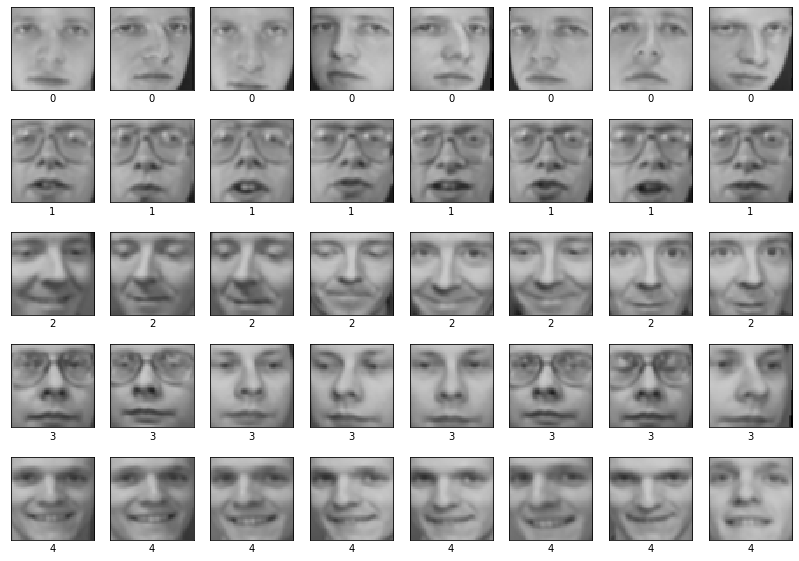

In [8]:
plt.figure( figsize=(14, 10), num='Some Images' )
plt.title( 'First 5 Targets' )
for i in range( 40 ):
    plt.subplot( 5, 8, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(train_labels[i])
plt.show()

**Normalize Data**

In [9]:
x_train = train_images.astype( 'float32' )/255
x_test = test_images.astype( 'float32' )/255
print(x_train[0].shape)

(48, 48, 3)


In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train.shape)
print(y_test.shape)

(320, 40)
(80, 40)


# Initial Predictive Model

**Model Definition**

In [11]:
 def create_model_1():
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(40, activation="softmax")
    ])
  opt = SGD(momentum=0.5)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [12]:
model = create_model_1()

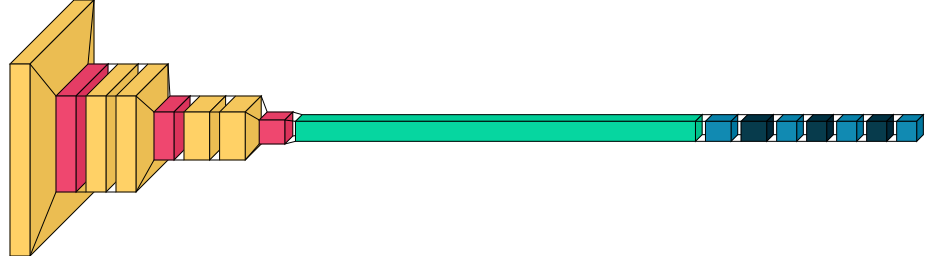

In [69]:
visualkeras.layered_view(model)

**Train Model, Use Test Set for Validation**

In [14]:
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/50
40/40 [==============================] - 17s 19ms/step - loss: 3.6917 - accuracy: 0.0225 - val_loss: 3.6872 - val_accuracy: 0.0250
Epoch 2/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6872 - accuracy: 0.0211 - val_loss: 3.6863 - val_accuracy: 0.0250
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6882 - accuracy: 0.0188 - val_loss: 3.6859 - val_accuracy: 0.0250
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6885 - accuracy: 0.0160 - val_loss: 3.6847 - val_accuracy: 0.0250
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6847 - accuracy: 0.0261 - val_loss: 3.6836 - val_accuracy: 0.0250
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6846 - accuracy: 0.0307 - val_loss: 3.6815 - val_accuracy: 0.0375
Epoch 7/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6842 - accuracy: 0.0272 - val_loss: 3.6803 - val_accuracy: 0.0250
Epoch 8/50
40/40 [

**Loss and Accuracy Plot**

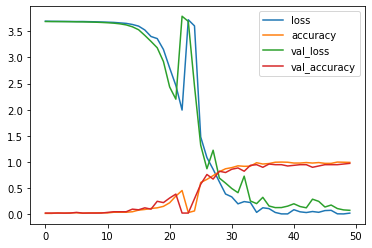

In [15]:
pd.DataFrame(model.history.history).plot()

# Define Base Models

In [23]:
 def create_model(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [24]:
 def create_model_4_conv_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [55]:
 def create_model_4_dense_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Experiment With Hyperparameters

In [56]:
accuracy_scores = list()
names = list()

In [57]:
model_1 = create_model(SGD(momentum=0.5), dropout = 0.1)
model_1.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
y_pred = np.argmax(model_1.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Baseline')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.9125


In [58]:
# Reduced Batch Size to 8
model_2 = create_model(SGD(momentum=0.5), dropout = 0.1)
model_2.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_2.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Reduced Batch Size')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.95


In [59]:
# Increased Number of Convolution Layers
model_3 = create_model_4_conv_layers(SGD(momentum=0.5), dropout = 0.1)
model_3.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_3.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Convolution Layers')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.9125


In [60]:
model_4 = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.1)
model_4.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_4.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Dense Layers')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.975


In [61]:
# Change SGD Momentum
model_5 = create_model(SGD(momentum=0.8), dropout = 0.1)
model_5.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_5.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Optimizer Momentum')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.95


In [62]:
# Increase Batch Size
model_6 = create_model(SGD(momentum=0.5), dropout = 0.1)
model_6.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = np.argmax(model_6.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Batch Size')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.925


In [63]:
# Adam Optimizer
model_7 = create_model('adam', dropout = 0.1)
model_7.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_7.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Adam Optimizer')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.025


In [64]:
model_8 = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.25)
model_8.fit(x_train, y_train, epochs=100, batch_size=8, verbose=0)
y_pred = np.argmax(model_8.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Increased Dropout')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.95


In [65]:
model_9 = create_model_4_dense_layers(SGD(momentum=0.3), dropout = 0.1)
model_9.fit(x_train, y_train, epochs=150, batch_size=4, verbose=0) #Increased epochs to compensate for decreased momentum and batch size
y_pred = np.argmax(model_9.predict(x_test), axis = 1)
accuracy = accuracy_score(test_labels, y_pred)
accuracy_scores.append(accuracy)
names.append('Decreased Momentum and Batch Size')
print("Test Set Accuracy: {}".format(str(accuracy)))

Test Set Accuracy: 0.9625


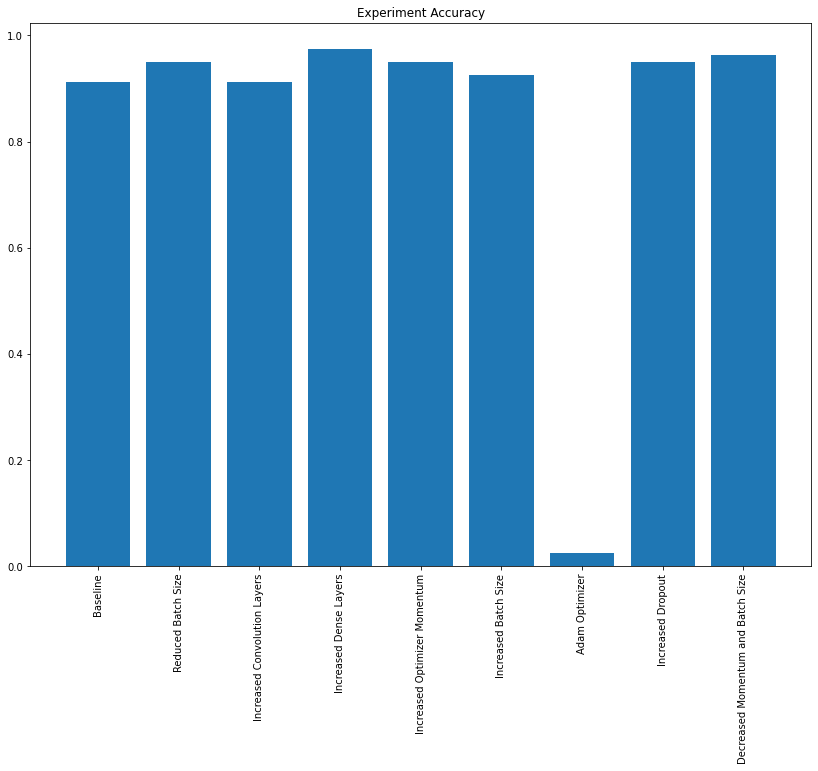

In [66]:
plt.figure( figsize=(14,10) )
plt.title( 'Experiment Accuracy' )
plt.bar(names, accuracy_scores)
plt.xticks(rotation=90)
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

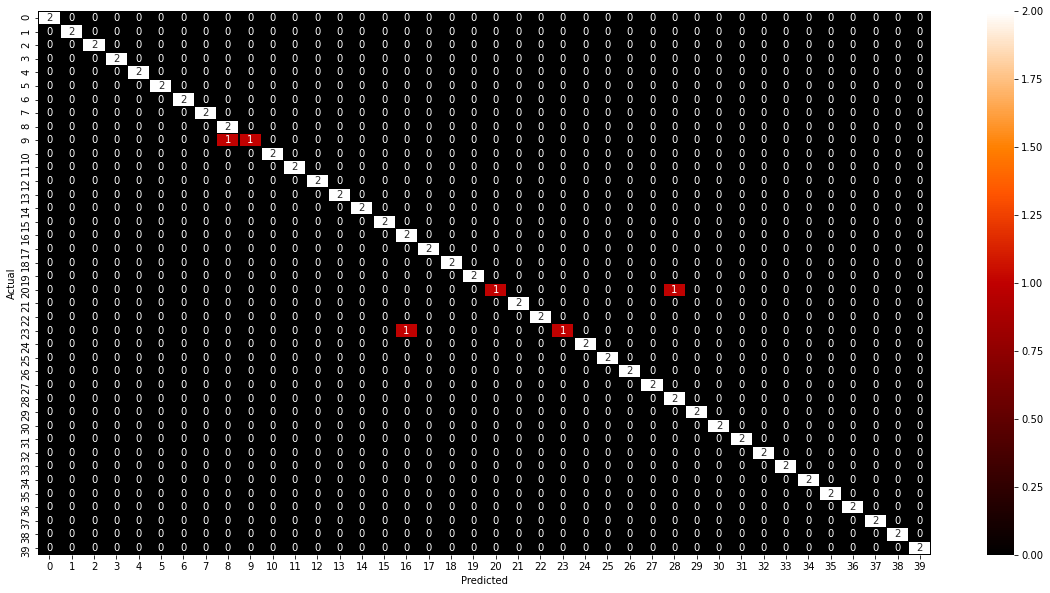

In [68]:
pred_labels = np.argmax(model_9.predict(x_test), axis = 1)
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=np.arange(0,40), vmax=2, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")